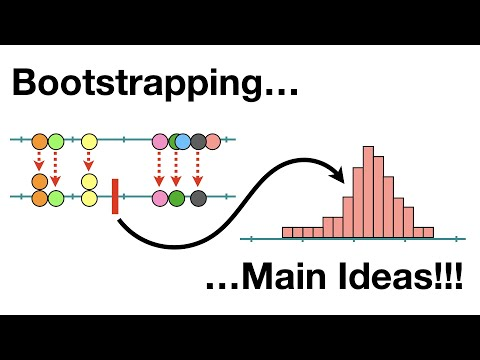

In [21]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

# Question 1

When talking about the difference between the standard deviation and the standard error of the mean, it is best to start with their main definitions and how we derive their values.

The standard deviation is a measure of the spread of data, the higher the standard deviation, the more spread it has. Spread can easily be understood and how "wide" or varied the data set is. A data set with data points from 0 to 50 has less spread than one that has points from 0 to 100 and can be calculated with a simple formula.

The standard error of the mean can be calculated in 2 different ways, there is a complicated formula which can be applied directly to the original population data but does not aid our understanding of their differences and what each one entails. A better way to look at it is through the process of bootstrapping.

Bootstrapping takes repeated samples from our original population (with replacement meaning we can choose the same data point more than once) and with it creates a new histogram that in return has its own mean. Doing this a number of times creates a histogram of our possible means that simulates means that we could have gotten if we hypothetically redid the experiment over and over again. 

With this histogram of the means we see that itself also has a variation, and this variation is what our standard error of the mean is. It states that if we were to hypothetically take a sample from our population, the difference in between the actual mean and the sample mean is this measure of standard error of the mean. And difference in this case does not necessarily mean an actual subtraction between the 2 means, just that the different value of the mean can be expected based on this measurement.

# Question 2

To create a confidence interval of 95% from the bootstrapped sample means, we must first find the 2.5th percentile and the 97.5th percentile to ensure that we get the middle 95% of the means from the distribution. Once the 2 percentiles are found, the corresponding means create the interval, giving us the 95% confidence interval. This means that in this interval of bootstrapped means, there is a 95% chance that the population mean lies between these 2 boostrapped means.

# Question 3

As stated above, you can discover the confidence interval by using percentiles instead of using the standard deviation of the bootstrapped sample means to calculate the confidence interval.

# Question 4

95% Bootstrap Confidence Interval for the Population Mean: [92.73, 100.68]


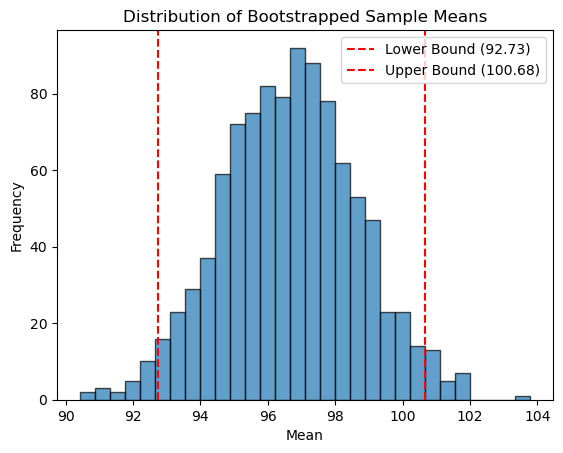

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generates random points from a distribution
np.random.seed(42)  # For reproducibility
data = np.random.normal(loc=100, scale=15, size=50)  # Mean = 100, SD = 15, n = 50

# How many times we will be sampling the data set (the bootstrap sampling number)
n_bootstrap_samples = 1000
bootstrapped_means = []

# Perform bootstrapping
for _ in range(n_bootstrap_samples):
    # Resample the data with replacement
    bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
    # Calculate the mean of the bootstrap sample
    # Where it says np.mean(...) can be changed to other paramters like median
    bootstrapped_means.append(np.mean(bootstrap_sample))

# Convert the list of bootstrapped means to a NumPy array
bootstrapped_means = np.array(bootstrapped_means)

# Calculate the 2.5th and 97.5th percentiles for the 95% confidence interval
lower_bound = np.percentile(bootstrapped_means, 2.5)
upper_bound = np.percentile(bootstrapped_means, 97.5)

# Display the results
print(f"95% Bootstrap Confidence Interval for the Population Mean: [{lower_bound:.2f}, {upper_bound:.2f}]")

# Optional: Plot the distribution of bootstrapped means
plt.hist(bootstrapped_means, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(lower_bound, color='red', linestyle='--', label=f'Lower Bound ({lower_bound:.2f})')
plt.axvline(upper_bound, color='red', linestyle='--', label=f'Upper Bound ({upper_bound:.2f})')
plt.title('Distribution of Bootstrapped Sample Means')
plt.xlabel('Mean')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Chatbot Logs for Q1-4: https://chatgpt.com/share/66fc8671-9154-8007-8716-392653a145af

# Question 5

When it comes to understanding why we must distinguish population parameters from sample statistics when it comes to confidence intervals, we have to understand each of their definitions.

Population parameters are values that characterize an entire population. Values such as the population mean, median, mode, variance, etc. are all numerical values which are used to describe the distribution of a population. Often either do to impracticality or price or other factors, getting such statistics for populations can be hard and we must work with samples.

Sample statistics are values that describe the characteristics of a sample. They follow the same logic as a population parameter, as the sample has its own mean, median, variance, etc. However, the main difference is that with enough sample statistics, we can predict/estimate such values for the population through bootstrapping.

So when it comes to distinguishing each one of these analyses for confidence intervals, a confidence interval is created using sample statistics to predict a parameter for a population. For example a confidence interval for a population's mean is created by repeatedly calculating sample means (through bootstrapping) and then with that interval at a given confidence (90%, 95%, etc.) you expect the population mean (a parameter) to exist within that range.

# Question 6

    1. What is the process of Bootstrapping
Bootstrapping is the process of randomly taking samples from your original data set, with replacement and creating a "new histogram". Repeating this process over and over again, helps us simulate different characteristics of our original population. So what does this mean? Well, if we were to have 50 data points, our bootstrapped sample would be 50 points, but then you would ask if its 50 points and we randomly take out each point from our original data set, won't we have just copied our original population? No, because this is where with the term "replacement" is key, imagine replacement as having a bag of 5 marbles, 1 red and 4 blue, if I were to take a red one out, using some magic a new red marble is put back into my bag, meaning I still have a 1/5 in chance of choosing the red marble the next time I put my hand in. The same is with data, when I take the data point, the point is put back into the original data set, for me to have the chance to pick it up again. This is how bootstrapping simulates the same experiment or study over many iterations, by having the chance that in this iteration of boostrapping, I choose a point 3 times, compared to a different iteration where it only chose a point once, leading to variation. From this variation we can create new histograms, and most importantly simulate what our experiment would have looked like if we had experimented more.

    2. What is the main purpose of Bootstrapping?
Imagine you did an experiment and after some time you collected 100 points however, you would have liked to repeat the experiment again or a few more times to get more data and a better idea of what you average would be, or your median or another description of your data you can think of. But lets say that each experiment costs 1000 dollars, and you only have 1200 in your budget, meaning you can't afford another experiment. This is where bootstrapping comes to save the day! Bootstrapping would "recreate" having extra experiments by the process explained above, and after a few thousand trials (not that much), you would get an idea of what your experiment's mean, or median or another descriptive measure (called a parameter) if you had the budget to experiment a few thousand more times.

    3. If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?
I talked a lot about how bootstrapping can be used to estimate a population's parameter (description like mean, median, etc.) but never how. After I bootstrap my data 1000 times, each one of these histograms (sampled data) has its own mean, median, and mode, so guess what, I can make a histogram of all of my means or medians, etc. After I have done this, I can find something called a confidence interval. A confidence interval is an interval of values, where I have a certain confidence or a certain probability that a value lies within this interval. This interval in return can predict if a mean we hypothesized is plausible or not. An example could be, after bootstrapping, and making an histogram of means (remember it can be any other description), I create a confidence interval of 95% and the interval is [100, 109], meaning that from my histogram of means, 95% of my data lies between 100-109, meaning the chance of our hypothesis of the population mean being within this interval is 95%. Anything below or above this interval if it is our original hypothesis is not plausible as it has a much lower probability of being the actual population mean. A small caveat to know here, is that even for our confidence interval, there is still a 5% chance that our hypothesis (if it is inside this interval of values) might not be correct.

# Question 7

If the confidence interval covers 0, then at some point during the bootstrapping process, a calculated mean was 0. This means that our population might have a chance to be 0, hence it leading to failing to reject the null hypothesis. If we were to see if we could reject the null hypothesis, we would have to get bootstrapping means to be never be equal to 0, leading to a conclusion that the effect of something or the null hypothesis never happens.

# Question 8

**Introduction**

The scope of this statistical analysis is to see if the vaccine created by AliTech is effective in improving health by checking if the healthscore of our data has increased.

    Important Notes:
    1. If during our statistical analysis we come across the null hypothesis we can not affirmatively conclude that this 
    vaccine is effective in improving health. The null hypothesis in our case will be if we encounter a change in 
    healthscore to be equal to 0, indicating that we may have a population where the change in health by this vaccine has no effect.
    2. Visualizations: The visualization below is a number line that plots out the difference between the new healthscore, and the original one, Equation: Change in Healthscore = New_Healthscore - Original_Healthscore

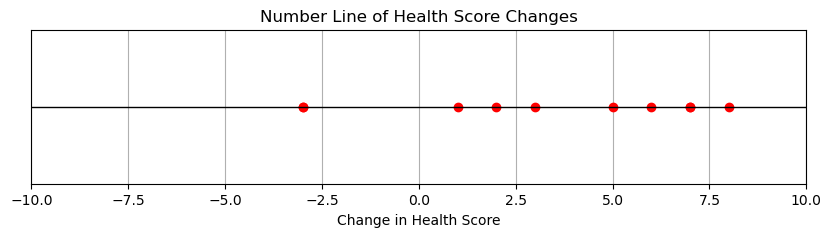

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV from the URL into a pandas DataFrame
df = pd.read_csv('patient_health_data.csv')

# Step 1: Calculate the change in health scores
df['ChangeInHealthScore'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Step 2: Create a number line plot
plt.figure(figsize=(10, 2))  # Set the figure size

# Plot each patient's change as a point on the number line
for i, change in enumerate(df['ChangeInHealthScore']):
    plt.plot(change, 0, 'ro')  # 'ro' is for red dots
    

# Add a horizontal line to represent the number line
plt.axhline(0, color='black', linewidth=1)

# Set the x-axis limits (you can adjust this depending on the range of changes)
plt.xlim(-10, 10)

# Remove the y-axis (since it's just a number line)
plt.yticks([])

# Add labels and title
plt.xlabel('Change in Health Score')
plt.title('Number Line of Health Score Changes')

# Show the plot
plt.grid(True)
plt.show()

**Methodology**

We will begin to create a new column that will contain the changes in healthscore and from it we will conduct a bootstrapping approach that will in return allow us to visualize the possible means, the standard mean error, and the 95% confidence interval. 

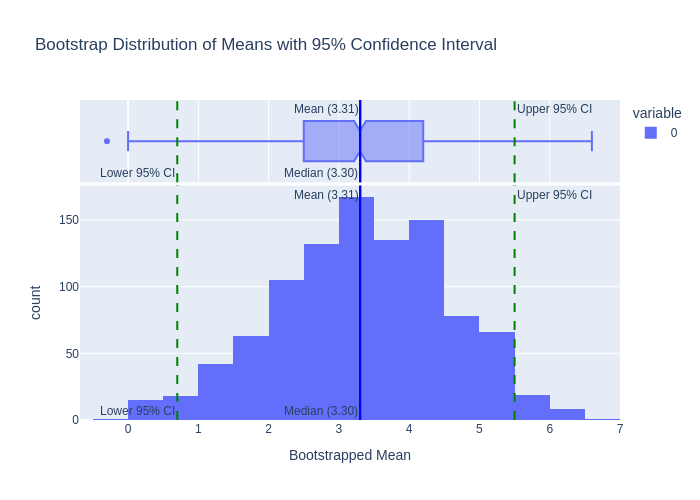

Red Line: Mean
Blue Line: Median
95% Confidence Interval: [0.7, 5.5]
SEM = 1.2310051787055976


In [20]:
import pandas as pd
import numpy as np
import plotly.express as px

# Set the random seed for reproducibility
np.random.seed(42)

# Number of bootstrap iterations
n_iterations = 1000

# Step 2: Generate bootstrap samples and calculate means
bootstrapped_means = []
for _ in range(n_iterations):
    # Take a bootstrap sample (sampling with replacement)
    sample = df['ChangeInHealthScore'].sample(frac=1, replace=True)
    # Calculate the mean of the bootstrap sample and store it
    bootstrapped_means.append(sample.mean())

# Convert bootstrapped means to a numpy array
bootstrapped_means = np.array(bootstrapped_means)

# Step 3: Calculate the 95% Confidence Interval (CI)
lower_bound = np.percentile(bootstrapped_means, 2.5)
upper_bound = np.percentile(bootstrapped_means, 97.5)

# Step 4: Calculate the Standard Error of the Mean (SEM)
sem = np.std(bootstrapped_means)

# Step 5: Create a histogram of the bootstrapped means using Plotly Express
fig = px.histogram(bootstrapped_means, 
                   nbins=30, 
                   title="Bootstrap Distribution of Means with 95% Confidence Interval",
                   labels={'value':'Bootstrapped Mean'},
                   marginal="box")

# Step 6: Highlight the 95% confidence interval in the plot
fig.add_vline(x=lower_bound, line_width=2, line_dash="dash", line_color="green", annotation_text="Lower 95% CI", annotation_position="bottom left")
fig.add_vline(x=upper_bound, line_width=2, line_dash="dash", line_color="green", annotation_text="Upper 95% CI", annotation_position="top right")

# Step 7: Highlight the Standard Error of the Mean (SEM)
fig.add_vline(x=np.mean(bootstrapped_means), line_width=2, line_color="red", annotation_text=f"Mean ({bootstrapped_means.mean():.2f})", annotation_position="top left")
fig.add_vline(x=np.median(bootstrapped_means), line_width=2, line_color="blue", annotation_text=f"Median ({np.median(bootstrapped_means):.2f})", annotation_position="bottom left")

# Display the plot
fig.show(renderer = 'png')

print('Red Line: Mean')
print('Blue Line: Median')
print('95% Confidence Interval: ' + '[' + str(lower_bound) + ", " + str(upper_bound) + ']')
print('SEM = ' + str(sem))

The code begins to work by bootstrapping samples from the original data set and calculates its mean, of which it stores it in the bootstrapping_means array. The data its sampling comes from the column 'ChangeInHealthScore' of which the values were calculated by finding the difference between the original healthscore and the new healthscore after people took the vaccine.

Afterwards, using the numpy library, we are able to calculate the 2.5 percentile and the 97.5 percentile so we can estimate the 95% confidence interval. Furthermore, we calculate the standard deviation of our bootstrapped samples so we can calculate the SEM of 1.23.

Afterwards our main visualization of a histogram plots the sampled means (has a shape very similar to a normal distribution) with the confidence intervals and the SEM. Furthermore to better help visualize the data, I have included a box-whisker plot on the top withe median being the blue line, also to show we have some outliers.

The blue line represents the mean of the our bootstrapped data and the 2 vertical green dashed lines are our upper and lower bounds for our confidence interval.

**Findings**

We can say that in this particular case, we can reject the null hypothesis. Although the histogram shows that we did have a mean with 0 change, since it is not apart of our 95% confidence interval we can exclude it. There is a certain caveat as our 95% confidence interval can be wrong however, not knowing the true mean of the original population (in this case too small to be accurate), we can say that our estimate for the mean will lie between 0.7 and 5.5. 

Some other considerations would be to see if we ran this bootstrapping sample with different numpy random.seeds, if we would ever encounter a situation where the confidence interval includes the null hypothesis. Another interesting consideration to keep in mind is if we were to increase the confidence interval, if then we would encounter the null hypothesis.

Chatbot Logs for Q5-Q8: https://chatgpt.com/share/66fe9acc-9498-8007-b59a-7e47734d07e2

# Question 9

Yes